## CBOW 모델 구현

In [1]:
w,b = [1,2]
print(w,b)

1 2


In [2]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer] # 입력, 출력
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

### 학습 코드 구현

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 295 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 296 |  반복 1 / 2 | 시간 0[s] | 손실 1.01
| 에폭 297 |  반복 1 / 2 | 시간 0[s] | 손실 1.08
| 에폭 298 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 299 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 300 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 301 |  반복 1 / 2 | 시간 0[s] | 손실 1.06
| 에폭 302 |  반복 1 / 2 | 시간 0[s] | 손실 0.99
| 에폭 303 |  반복 1 / 2 | 시간 0[s] | 손실 0.89
| 에폭 304 |  반복 1 / 2 | 시간 0[s] | 손실 1.09
| 에폭 305 |  반복 1 / 2 | 시간 0[s] | 손실 1.06
| 에폭 306 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 307 |  반복 1 / 2 | 시간 0[s] | 손실 1.06
| 에폭 308 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 309 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 310 |  반복 1 / 2 | 시간 0[s] | 손실 1.08
| 에폭 311 |  반복 1 / 2 | 시간 0[s] | 손실 0.97
| 에폭 312 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 313 |  반복 1 / 2 | 시간 0[s] | 손실 0.96
| 에폭 314 |  반복 1 / 2 | 시간 0[s] | 손실 0.99
| 에폭 315 |  반복 1 / 2 | 시간 0[s] | 손실 0.95
| 에폭 316 |  반복 1 / 2 | 시간 0[s] | 손실 0.84
| 에폭 317 |  반복 1 / 2 | 시간 0[s] | 손실 1.07
| 에폭 318 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 319 |  반복 1

| 에폭 588 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 589 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 590 |  반복 1 / 2 | 시간 0[s] | 손실 0.68
| 에폭 591 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 592 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 593 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 594 |  반복 1 / 2 | 시간 0[s] | 손실 0.71
| 에폭 595 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 596 |  반복 1 / 2 | 시간 0[s] | 손실 0.47
| 에폭 597 |  반복 1 / 2 | 시간 0[s] | 손실 0.76
| 에폭 598 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 599 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 600 |  반복 1 / 2 | 시간 0[s] | 손실 0.68
| 에폭 601 |  반복 1 / 2 | 시간 0[s] | 손실 0.63
| 에폭 602 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 603 |  반복 1 / 2 | 시간 0[s] | 손실 0.80
| 에폭 604 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 605 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 606 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 607 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 608 |  반복 1 / 2 | 시간 0[s] | 손실 0.38
| 에폭 609 |  반복 1 / 2 | 시간 0[s] | 손실 0.88
| 에폭 610 |  반복 1 / 2 | 시간 0[s] | 손실 0.54
| 에폭 611 |  반복 1 / 2 | 시간 0[s] | 손실 0.72
| 에폭 612 |  반복 1

| 에폭 932 |  반복 1 / 2 | 시간 1[s] | 손실 0.71
| 에폭 933 |  반복 1 / 2 | 시간 1[s] | 손실 0.32
| 에폭 934 |  반복 1 / 2 | 시간 1[s] | 손실 0.62
| 에폭 935 |  반복 1 / 2 | 시간 1[s] | 손실 0.40
| 에폭 936 |  반복 1 / 2 | 시간 1[s] | 손실 0.62
| 에폭 937 |  반복 1 / 2 | 시간 1[s] | 손실 0.41
| 에폭 938 |  반복 1 / 2 | 시간 1[s] | 손실 0.59
| 에폭 939 |  반복 1 / 2 | 시간 1[s] | 손실 0.52
| 에폭 940 |  반복 1 / 2 | 시간 1[s] | 손실 0.39
| 에폭 941 |  반복 1 / 2 | 시간 1[s] | 손실 0.61
| 에폭 942 |  반복 1 / 2 | 시간 1[s] | 손실 0.41
| 에폭 943 |  반복 1 / 2 | 시간 1[s] | 손실 0.50
| 에폭 944 |  반복 1 / 2 | 시간 1[s] | 손실 0.53
| 에폭 945 |  반복 1 / 2 | 시간 1[s] | 손실 0.50
| 에폭 946 |  반복 1 / 2 | 시간 1[s] | 손실 0.57
| 에폭 947 |  반복 1 / 2 | 시간 1[s] | 손실 0.50
| 에폭 948 |  반복 1 / 2 | 시간 1[s] | 손실 0.39
| 에폭 949 |  반복 1 / 2 | 시간 1[s] | 손실 0.62
| 에폭 950 |  반복 1 / 2 | 시간 1[s] | 손실 0.47
| 에폭 951 |  반복 1 / 2 | 시간 1[s] | 손실 0.52
| 에폭 952 |  반복 1 / 2 | 시간 1[s] | 손실 0.39
| 에폭 953 |  반복 1 / 2 | 시간 1[s] | 손실 0.53
| 에폭 954 |  반복 1 / 2 | 시간 1[s] | 손실 0.50
| 에폭 955 |  반복 1 / 2 | 시간 1[s] | 손실 0.67
| 에폭 956 |  반복 1

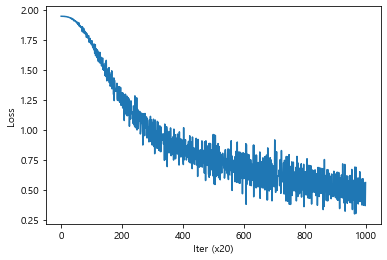

you [ 0.8926529  -1.6237255  -0.92483026  1.0690066   0.9810564 ]
say [-1.1512454  -1.3179119   1.1361403  -1.1493264  -0.31328833]
goodbye [ 1.0899811  -0.03102065 -1.0639284   0.8917229   0.82374454]
and [-0.7837161  -1.3696555   0.60454255 -0.79113865 -1.8705093 ]
i [ 1.0572704  -0.03891209 -1.0327244   0.8728905   0.79881424]
hello [ 0.8964498 -1.6221269 -0.925756   1.0696275  0.9940115]
. [-1.1806811 -0.6875492  1.2727283 -1.1468172  1.722798 ]


In [3]:
import sys
sys.path.append('..')  
from common.trainer import Trainer
from common.optimizer import Adam
from common.util import preprocess, create_contexts_target, convert_one_hot
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

window_size = 1
hidden_size = 5 # 히든층 뉴런
batch_size = 3 # 미니배치
max_epoch = 1000 # 에폭

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size) # 맥락 벡터와 타겟 벡터
target = convert_one_hot(target, vocab_size) # 원핫벡터
contexts = convert_one_hot(contexts, vocab_size) # 원핫벡터
 
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam() 
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size) # 학습
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items(): # 디코드 사전의 키와 밸류 추출
    print(word, word_vecs[word_id]) # 벡터표현으로 출력

In [ ]:
# 히든 사이즈가 5라서 모든 단어가 size=5인 벡터로 표현됨.